<a href="https://colab.research.google.com/github/alexiej/laboratory/blob/master/20_00_Keras_API_functional_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

!nvidia-smi

Tensorflow version:  2.2.0-rc3
Sun Apr 26 06:44:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                             

#01 Keras Layers

## Input Tensor

In [0]:
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(1,))

## Dense Layer

In [0]:
from tensorflow.keras.layers import Input, Dense


output_layer = Dense(units=1)
output_tensor = output_layer(input_tensor)
print(output_tensor)

Tensor("dense_2/Identity:0", shape=(None, 1), dtype=float32)


#02 Keras Model

Instead of `Seqential()` model we can define our own model based on the `Graph` that include input tensor.

In [0]:
from tensorflow.keras.layers import Input, Dense
input_tensor = Input(shape=(13,))
output_tensor = Dense(1)(input_tensor)

from tensorflow.keras.models import  Model
model = Model(input_tensor, output_tensor)


## Compile model -> always required


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


## PLOT MODEL

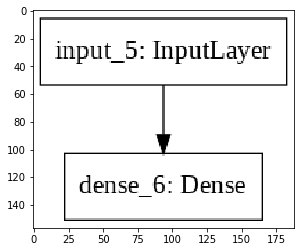

In [0]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model.png')
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

# 03 Fit Model



In [0]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
model.fit(x_train,y_train,
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True);

Train on 363 samples, validate on 41 samples
363/363 [==============================] - 0s 45us/sample - loss: 298.2135 - val_loss: 286.0095


# 04 Evaluate Model on test dataset

In [0]:
print(model.evaluate(x_test,y_test,verbose=False))

303.66128001493564
